# **A Simple Linear Regression Model Notebook for the Wallaroo Platform**
#### A Comprehensive Tutorial for:
1. Building a Linear Regression Model
2. Deploying the Model into Wallaroo
3. Using Wallaroo's Monitoring Capabilities to Analyze the Model.

## **Building a Simple Linear Regression Model**

This model will be built from a data set of sensor values and the occupancy of the room the sensors are in.
The goal is to use the sensor data to predict the room occupancy.

### **Importing the Necessary Python Libraries**

We will use a variety of libraries to implement the linear regression model

#### These libraries include:
- matplotlib
- numpy
- sklearn
- pandas
- onnx

In [1]:
# Code Source: Us

# Needed for data visualization
import matplotlib.pyplot as plt

# Needed for data tuning
import numpy as np

# Needed for creating the linear regression model
from sklearn import linear_model

# Needed for metrics of the model
from sklearn.metrics import mean_squared_error, r2_score

# Needed for csv importing
import pandas as pd

### **Importing the Data Set using Pandas**
The first step creating a linear regression model is read in the dataset using the pandas library  
The `read_csv` method is responsible for reading in the data and `head()` method acesses the first few rows in the data  
When picking a variable from the data we'll use `.corr()` to find which variable has the best correlation in the dataset

In [2]:
# Reading and displaying the dataset
data = pd.read_csv('Occupancy_Estimation.csv')
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
# Displays the correlations between each and every variables
data.corr()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
S1_Temp,1.000000,0.799707,0.948839,0.855279,0.680743,0.548735,0.645163,0.212217,0.436099,0.391137,0.438769,0.355826,0.866718,0.137391,0.436363,0.474077,0.700868
S2_Temp,0.799707,1.000000,0.765525,0.696581,0.639773,0.645987,0.607349,0.370897,0.438274,0.409545,0.427133,0.378724,0.743722,0.202547,0.476901,0.465884,0.671263
S3_Temp,0.948839,0.765525,1.000000,0.885186,0.594311,0.500054,0.642601,0.301419,0.375183,0.344026,0.398177,0.326182,0.821308,0.095842,0.403355,0.460309,0.652047
S4_Temp,0.855279,0.696581,0.885186,1.000000,0.581482,0.456350,0.588459,0.386871,0.355111,0.312594,0.340808,0.294939,0.650320,0.106208,0.340000,0.339037,0.526509
S1_Light,0.680743,0.639773,0.594311,0.581482,1.000000,0.842090,0.816438,0.510853,0.601166,0.534274,0.494080,0.441712,0.602740,0.498185,0.607159,0.545213,0.849058
S2_Light,0.548735,0.645987,0.500054,0.456350,0.842090,1.000000,0.709579,0.458914,0.503021,0.560630,0.439269,0.413932,0.566764,0.493281,0.554658,0.556797,0.788764
S3_Light,0.645163,0.607349,0.642601,0.588459,0.816438,0.709579,1.000000,0.579484,0.502606,0.434859,0.577151,0.473606,0.650829,0.447708,0.501836,0.577815,0.793081
S4_Light,0.212217,0.370897,0.301419,0.386871,0.510853,0.458914,0.579484,1.000000,0.293632,0.303949,0.169702,0.200793,0.148608,0.212718,0.324545,0.220196,0.355715
S1_Sound,0.436099,0.438274,0.375183,0.355111,0.601166,0.503021,0.502606,0.293632,1.000000,0.560062,0.540736,0.557733,0.391903,0.335772,0.522015,0.463040,0.573748
S2_Sound,0.391137,0.409545,0.344026,0.312594,0.534274,0.560630,0.434859,0.303949,0.560062,1.000000,0.529830,0.578635,0.333836,0.357235,0.485697,0.507231,0.557853


### **Pulling our Independent (x) and Dependent (y) Variables from the DataFrame**
Next we are going to access the Independent variable `S1_Light` and Dependent variable `Room_Occupancy_Count` to be stored in the x and y value  
The `values` function accesses the values in the dataset at the index of the given variable name

In [4]:
# Matrix of features x and prints data x
x = data[['S1_Light']].values
print(x)

# Array of independent variable y and prints data y
y = data['Room_Occupancy_Count'].values
print(y)

[[121]
 [121]
 [121]
 ...
 [  6]
 [  6]
 [  6]]
[1 1 1 ... 0 0 0]


### **Splitting the Data Set into Testing and Training Subsets**
Next we use the `train_test_split()` method in the sklearn library to split the data into test and train sets 
The train_test_split gives test/train data to x and y  
Create test and train datasets with 0.2 (20%) of the dataset being test data  
The `random_state` decides which indices of data to pull from  


In [5]:
from sklearn.model_selection import train_test_split

# The train_test_split gives test/train data to x and y
# Create test and train datasets with 0.2 (20%) of the dataset being test data
# The random_state decides which indices of data to pull from
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

### **Creating the Linear Regression Model using Sklearn and Fitting our Training Data to the Model**
Now using `LinearRegression()` method we create a linear regression object which we call `regr`  
Then we take `.fit(x_train, y_train)` method uses x and y train data as parameters to see how well it fits the model

In [6]:
from sklearn.linear_model import LinearRegression

# Creating the linear regression object
regr = LinearRegression()

# The regr.fit() measures how well the x and y train data fit the model
regr.fit(x_train, y_train)

LinearRegression()

### **Predicting the Room Occupancy from our Independent Variable Test Set**
In this step we take in the independent variable test set for a the parameter in the `predict()` method in order to predict the outcome for the dependent variable.

In [7]:
# The regr.predict() creates a prediction based on the x test data
y_pred = regr.predict(x_test)

### **Finding the Metrics to Analyze the Prediction**
In this step we use various functions and methods in order to see how well our linear regression model is predicting our data. The  `coef_` function tells us the **correlation coefficient**, which shows in what way our variables correlate with each other. Next up we have the `mean_squared_error()` method, which shows us the distance from the estimated values and the true values; The best possible score would be 0. Lastly there's the `r2_score()` method which is responsible for displaying how well our data fits the current model, with an R^2 score of 1.

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Prints the coefficients
print("Coefficients: \n", regr.coef_)

# Prints the mean squared error
print("Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

# Prints the coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.01485442]
Root mean squared error: 0.46
Coefficient of determination: 0.73


### **Plotting the Linear Regression**
Using `plt` in **matplotlib** library we can print out the different aspects of our linear regression graph.

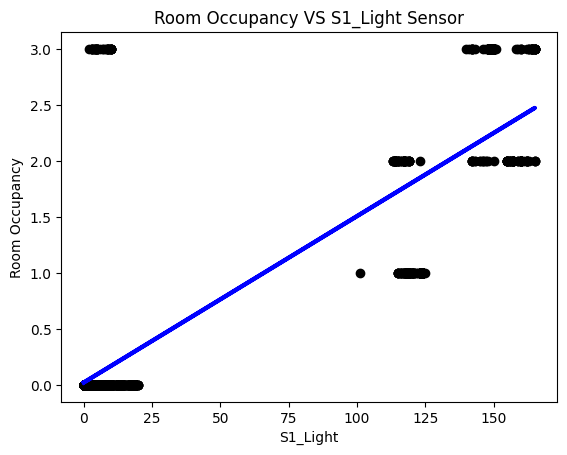

In [10]:
# The plt.scatter() plots the x and y test points in the linear regression model
plt.scatter(x_test, y_test, color="black")

# The plt.plot() creates the line of best fit
plt.plot(x_test, y_pred, color="blue", linewidth=3)

# Sets the x-axis, y-axis, and title of the model
plt.xlabel('S1_Light')
plt.ylabel('Room Occupancy')
plt.title('Room Occupancy VS S1_Light Sensor')

# The plt.show() displays the model
plt.show()

## **Deploying the Model into Wallaroo**

### **Converting the Sklearn Model into Onnx for use on the Wallaroo Platform**
For the next step refer to [sklearn-regression-to-onnx tutorial](https://docs.wallaroo.ai/wallaroo-tutorials/conversion-tutorials/sklearn-regression-to-onnx/https://docs.wallaroo.ai/wallaroo-tutorials/conversion-tutorials/sklearn-regression-to-onnx/) in the wallaroo documentation for how to convert file to onnx.  


In [11]:
# Used to load the sk-learn model
import pickle

# Used for the conversion process
import onnx, skl2onnx, onnxmltools
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx.common.data_types import DoubleTensorType

In [12]:
# The model_to_onnx converts the model to onnx to be upload to Wallaroo Platfrom
# For more detailed steps refer to "model_conversion"
def model_to_onnx(model, cols, *, input_type='Double'):
    input_type_lower=input_type.lower()
    # How to manage float values
    if input_type=='Double':
        tensor_type=DoubleTensorType
    elif input_type=='Float':
        tensor_type=FloatTensorType
    else:
        raise ValueError("bad input type")
    tensor_size=cols
    initial_type=[(f'{input_type_lower}_input', tensor_type([None, tensor_size]))]
    onnx_model=onnxmltools.convert_sklearn(model,initial_types=initial_type)
    return onnx_model

### **Reading and writing a pickle file**
Using the pickle `.dump` method we create a sample **.pickle** file and `.load` that stoes the file into a variable

In [13]:
# The pickle.dump() creating the sample.pickle file
pickle.dump(regr, open('occupancy_model.pickle', 'wb'))

# The pickle.load() is storing the file into a variable
sklearn_model = pickle.load(open('occupancy_model.pickle', 'rb'))

In [14]:
# The model_to_onnx() takes the pickle file and converts it to onnx
onnx_model_converted = model_to_onnx(sklearn_model, 1)

# The onnx.save_model() saves the converted model into a file
onnx.save_model(onnx_model_converted, "occupancy_model.onnx")

### **Implementing into Wallaroo**
Reference the [Wallaroo 101 Tutorial](https://docs.wallaroo.ai/wallaroo-101/)

In [15]:
# Needed for the use of Wallaroo
import wallaroo

# The wallaroo.Client() allows the file to access wallaroo platform
wl = wallaroo.Client()

In [16]:
# Creates the name for workspace, pipeline, and model
workspace_name = 'mnsuproject'
pipeline_name = 'occupancypipeline'
model_name = 'occupancymodel'

# Created to fetch the model
model_file_name = 'occupancy_model.onnx'

In [17]:
# The get_workspace() gets/create the workspace when needed
# For more detailed steps refer to "wallaroo-101"
def get_workspace(name):
    workspace = None
    for ws in wl.list_workspaces():
        if ws.name() == name:
            workspace= ws
    if(workspace == None):
        workspace = wl.create_workspace(name)
    return workspace

# The get_pipeline() gets/create the pipeline when needed
# For more detailed steps refer to "wallaroo-101"
def get_pipeline(name):
    try:
        pipeline = wl.pipelines_by_name(pipeline_name)[0]
    except EntityNotFoundError:
        pipeline = wl.build_pipeline(pipeline_name)
    return pipeline

In [18]:
# Calls function to create workspace
workspace = get_workspace(workspace_name)

# The wl.set_current_workspace() sets the workspace to currently being worked on
wl.set_current_workspace(workspace)

{'name': 'mnsuproject', 'id': 13, 'archived': False, 'created_by': '5e5c838e-b6db-4c1c-935d-64e91be15b8e', 'created_at': '2022-09-21T20:20:36.547755+00:00', 'models': [{'name': 'occupancymodel', 'version': '45904398-7ce1-4cfe-b01f-91524c8ecba8', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datetime.datetime(2022, 9, 21, 20, 20, 37, 517983, tzinfo=tzutc())}, {'name': 'occupancymodel', 'version': '303d4175-44ce-4939-a50d-ebccf53e3e36', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datetime.datetime(2022, 9, 28, 15, 19, 26, 509665, tzinfo=tzutc())}, {'name': 'occupancymodel', 'version': '14d781b4-8f09-43be-835e-6cae3cfe16e9', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datetime.datetime(2022, 9, 28, 15, 26, 39, 900902, tzinfo=tzutc())}, {'name': 'occupancymodel', 'version': '75687b2b-6246-4565-933c-f57ec9e832d0', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datet

In [19]:
# Thw wl.list_workspaces() prints the lists of the workspaces
wl.list_workspaces()

Name,Created At,Users,Models,Pipelines
v-dylan.moore@wallaroo.ai - Default Workspace,2022-09-02 21:39:41,"['v-dylan.moore@wallaroo.ai', 'v-samuel.baeyen@wallaroo.ai', 'v-joseph.bigger@wallaroo.ai', 'v-jit.bhakta@wallaroo.ai', 'v-nathaniel.bursch@wallaroo.ai']",2,1
testautoconversion,2022-09-21 15:04:52,"['v-joseph.bigger@wallaroo.ai', 'v-jit.bhakta@wallaroo.ai', 'v-dylan.moore@wallaroo.ai', 'v-samuel.baeyen@wallaroo.ai', 'v-nathaniel.bursch@wallaroo.ai']",23,3
mnsuproject,2022-09-21 20:20:36,"['v-dylan.moore@wallaroo.ai', 'v-samuel.baeyen@wallaroo.ai', 'v-nathaniel.bursch@wallaroo.ai', 'v-joseph.bigger@wallaroo.ai', 'v-jit.bhakta@wallaroo.ai']",125,1
testworkspace,2022-09-30 16:51:03,['v-dylan.moore@wallaroo.ai'],4,1
testworkspace2,2022-09-30 16:55:33,['v-dylan.moore@wallaroo.ai'],1,1
testworkspacenew,2022-09-30 16:57:39,['v-dylan.moore@wallaroo.ai'],1,1


In [20]:
wl.set_current_workspace(workspace)
wl.get_current_workspace()

{'name': 'mnsuproject', 'id': 13, 'archived': False, 'created_by': '5e5c838e-b6db-4c1c-935d-64e91be15b8e', 'created_at': '2022-09-21T20:20:36.547755+00:00', 'models': [{'name': 'occupancymodel', 'version': '45904398-7ce1-4cfe-b01f-91524c8ecba8', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datetime.datetime(2022, 9, 21, 20, 20, 37, 517983, tzinfo=tzutc())}, {'name': 'occupancymodel', 'version': '303d4175-44ce-4939-a50d-ebccf53e3e36', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datetime.datetime(2022, 9, 28, 15, 19, 26, 509665, tzinfo=tzutc())}, {'name': 'occupancymodel', 'version': '14d781b4-8f09-43be-835e-6cae3cfe16e9', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datetime.datetime(2022, 9, 28, 15, 26, 39, 900902, tzinfo=tzutc())}, {'name': 'occupancymodel', 'version': '75687b2b-6246-4565-933c-f57ec9e832d0', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datet

In [21]:
# The wl.upload_model() uploads the model to the platform
occupancy_model = wl.upload_model(model_name, model_file_name).configure()
# module_post = wl.upload_model("postprocess", "./postprocess.py").configure('python')

In [22]:
# wl.list_models()

In [23]:
# The wl.build_pipeline() creates the pipeline
occupancy_pipeline = wl.build_pipeline(pipeline_name)

# The occuupancy_pipeline.add_model_step() adds the model to pipeline to be deployed
occupancy_pipeline = occupancy_pipeline.add_model_step(occupancy_model)

In [24]:
# occupancy_pipeline = occupancy_pipeline.add_model_step(module_post)

In [25]:
# module_post

## **Using Wallaroo's Monitoring Capabilities to Analyze the Model.**

### **Adding validation to the model**
The `add_validation()` method is set to detects any negative numbers that might be in our models data.  
The validation step must be implemented before deploying the pipeline, do to it creating errors if appied after deploying the pipeline.

In [26]:
occupancy_pipeline = occupancy_pipeline.add_validation('no_negative_people', occupancy_model.outputs[0][0] > float(0))

In [27]:
# The occupancy_pipeline.deploy() activating the pipeline
occupancy_pipeline.deploy()

Waiting for deployment - this will take up to 45s ..... ok


name,occupancypipeline
created,2022-09-21 20:20:37.684974+00:00
last_updated,2022-10-05 16:51:11.569757+00:00
deployed,True
tags,
steps,occupancymodel


In [28]:
# The occupancy_pipeline.status() displays the status of the pipeline
occupancy_pipeline.status()

{'status': 'Running',
 'details': None,
 'engines': [{'ip': '10.244.3.225',
   'name': 'engine-77cffd7b7c-gn6jb',
   'status': 'Running',
   'reason': None,
   'pipeline_statuses': {'pipelines': [{'id': 'occupancypipeline',
      'status': 'Running'}]},
   'model_statuses': {'models': [{'name': 'occupancymodel',
      'version': 'bb84628c-9fba-485c-9e7b-66a8159360b1',
      'sha': '5ec1e6cc7fbff691b0639592146da7603e3ab77b8be20c03dcc78b9faff8a405',
      'status': 'Running'}]}}],
 'engine_lbs': [{'ip': '10.244.3.226',
   'name': 'engine-lb-67c854cc86-jz2wb',
   'status': 'Running',
   'reason': None}]}

In [29]:
# Needed for the infrences
import json
from wallaroo.object import EntityNotFoundError

In [30]:
# The pandas_to_dict() converts the values into dictionary for infrences
def pandas_to_dict(df):
    input_dict = {
    'tensor': df.to_numpy().tolist()
    }
    return input_dict

In [31]:
# The data.iloc[# of rows, # of columns] and
raw = data.iloc[:10,6:7]
raw

,S1_Light
0,121
1,121
2,121
3,121
4,121
5,121
6,120
7,121
8,122
9,101


In [32]:
# Store values for infrences
# input_dict = pandas_to_dict(raw)
# input_dict = {'tensor': x_test.tolist()}
input_dict = {'tensor': [[-121], [-121]]}
# input_dict

In [33]:
# The occupancy_pipeline.infer() creates a result based on data given
result = occupancy_pipeline.infer(input_dict)
result

[InferenceResult({'check_failures': [{'False': {'expr': 'occupancymodel.outputs[0][0] > 0'}},
                     {'False': {'expr': 'occupancymodel.outputs[0][0] > 0'}}],
  'elapsed': 217701,
  'model_name': 'occupancymodel',
  'model_version': 'bb84628c-9fba-485c-9e7b-66a8159360b1',
  'original_data': {'tensor': [[-121], [-121]]},
  'outputs': [{'Double': {'data': [-1.776617515968567, -1.776617515968567],
                          'dim': [2, 1],
                          'v': 1}}],
  'pipeline_name': 'occupancypipeline',
  'shadow_data': {},
  'time': 1664988676930})]

In [34]:
# x = np.random.choice(data.shape[0], size = 10, replace = False)

In [35]:
# output = occupancy_pipeline.infer(pandas_to_dict(data.iloc[x,6:7]))

In [36]:
result[0].data()[0].tolist()

[[-1.776617515968567], [-1.776617515968567]]

In [37]:
# The occupancy_pipeline.undeploy() deactivates the pipeline
# occupancy_pipeline.undeploy()

In [38]:
logs = occupancy_pipeline.logs()
# type(logs)
# type(logs[0])
# vars(logs[0])
logs

[<wallaroo.logs.LogEntry at 0x7fb42b2d3a90>,
 <wallaroo.logs.LogEntry at 0x7fb42b2d3fa0>,
 <wallaroo.logs.LogEntry at 0x7fb42b2d39a0>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c250>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c940>,
 <wallaroo.logs.LogEntry at 0x7fb42b34cf10>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c520>,
 <wallaroo.logs.LogEntry at 0x7fb42b34ca00>,
 <wallaroo.logs.LogEntry at 0x7fb42b34cee0>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c400>,
 <wallaroo.logs.LogEntry at 0x7fb42b34cfd0>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c4c0>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c880>,
 <wallaroo.logs.LogEntry at 0x7fb42b34cf70>,
 <wallaroo.logs.LogEntry at 0x7fb42b34ce20>,
 <wallaroo.logs.LogEntry at 0x7fb42b34ce50>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c2e0>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c3a0>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c7c0>,
 <wallaroo.logs.LogEntry at 0x7fb42b34cdc0>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c280>,
 <wallaroo.logs.LogEntry at 0x7fb42b34cd30>,
 <wallaroo.logs.LogEntry at 0x7fb42b34ccd0>,
 <wallaroo.logs.LogEntry at 0x7fb42b34cbb0>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c220>,
 <wallaroo.logs.LogEntry at 0x7fb42b34caf0>,
 <wallaroo.logs.LogEntry at 0x7fb42b34ca30>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c970>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c850>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c6d0>,
 <wallaroo.logs.LogEntry at 0x7fb42b34c550>]